In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./train.csv")

In [22]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into training and test sets

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

In [10]:
Y_train

array([8, 6, 2, ..., 5, 3, 9], dtype=int64)

The image value is 0


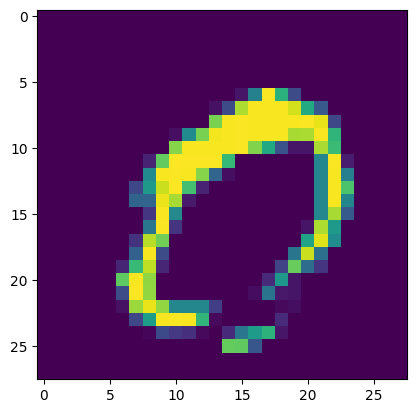

In [25]:
index = 1200
plt.imshow(data[index][1:len(data[index])].reshape(28,28))
print(f"The image value is {data[index][0]}")

In [12]:
import numpy as np

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.zeros((10, 1))  # Assuming 10 neurons in the first layer
    W2 = np.random.rand(10, 10) - 0.5  # Assuming 10 neurons in the second layer
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    return A

def ReLU_deriv(Z):
    return (Z > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [13]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [14]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / X.shape[1] * np.dot(dZ2, A1.T)
    db2 = 1 / X.shape[1] * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / X.shape[1] * np.dot(dZ1, X.T)
    db1 = 1 / X.shape[1] * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


In [15]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration:", i)
            predictions = get_predictions(A2)
            print("Accuracy:", get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
[5 5 0 ... 7 4 6] [8 6 2 ... 5 3 9]
Accuracy: 0.06260975609756098
Iteration: 10
[7 6 0 ... 7 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.16726829268292684
Iteration: 20
[7 6 8 ... 7 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.2678048780487805
Iteration: 30
[9 6 8 ... 7 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.3581951219512195
Iteration: 40
[4 6 8 ... 7 7 7] [8 6 2 ... 5 3 9]
Accuracy: 0.4297073170731707
Iteration: 50
[4 6 8 ... 9 7 9] [8 6 2 ... 5 3 9]
Accuracy: 0.48929268292682926
Iteration: 60
[8 6 8 ... 8 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.5386585365853659
Iteration: 70
[8 6 8 ... 8 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.5793658536585365
Iteration: 80
[8 6 8 ... 8 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.6141707317073171
Iteration: 90
[8 6 8 ... 8 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.642
Iteration: 100
[8 6 2 ... 8 7 4] [8 6 2 ... 5 3 9]
Accuracy: 0.6646585365853659
Iteration: 110
[8 6 2 ... 8 3 4] [8 6 2 ... 5 3 9]
Accuracy: 0.6844878048780488
Iteration: 120
[8 6 2 ... 8 3 4] [8 6 2 ... 5 3 9]
Accuracy: 

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


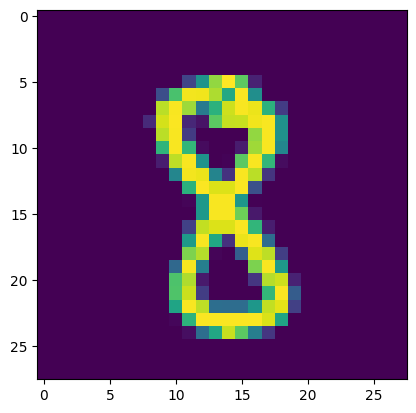

Prediction:  [6]
Label:  6


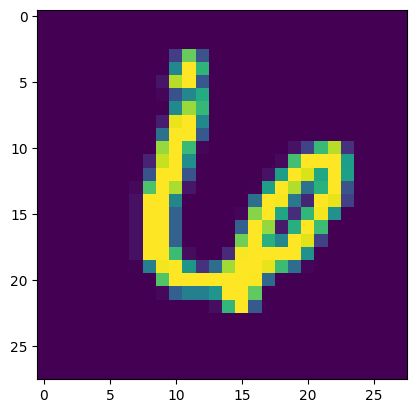

Prediction:  [2]
Label:  2


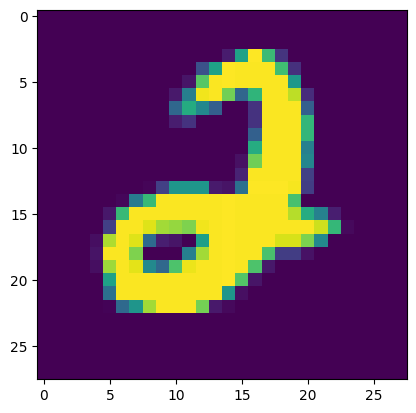

Prediction:  [8]
Label:  2


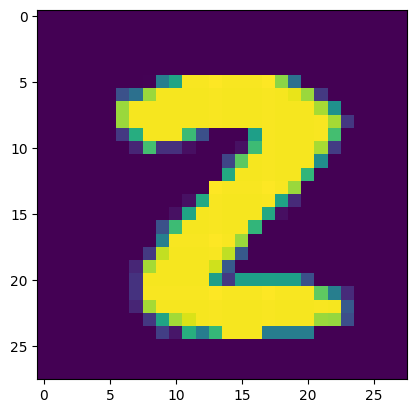

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [20]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[8 7 3 1 1 7 4 1 0 8 9 4 7 6 7 5 3 4 8 1 2 4 3 6 3 8 1 1 3 8 9 5 1 9 1 6 0
 2 6 4 0 6 5 7 1 6 1 4 6 8 1 0 3 8 7 3 1 2 3 4 4 2 3 7 5 8 0 0 7 0 2 4 1 0
 7 3 3 4 5 7 7 4 4 2 4 8 9 1 9 1 2 2 7 0 3 8 9 0 5 5 3 0 6 2 6 4 2 9 4 6 2
 1 8 0 3 8 4 7 2 9 7 3 5 4 7 6 0 1 8 5 1 1 4 8 5 4 8 9 6 3 1 6 2 3 9 6 7 9
 4 9 3 7 6 6 2 7 2 4 3 8 2 0 6 1 4 8 6 6 6 3 1 8 8 7 0 1 5 9 3 2 0 1 0 3 6
 7 9 6 5 0 1 3 3 7 4 5 3 7 8 4 9 6 1 3 1 3 9 4 6 2 4 4 3 0 4 9 4 1 3 9 3 2
 0 9 2 8 6 5 1 6 8 1 1 1 3 5 1 6 3 3 9 9 2 0 0 5 3 2 2 5 0 0 0 5 6 8 1 1 3
 9 2 3 1 1 8 1 8 7 1 7 1 2 4 9 5 1 7 3 3 2 2 9 4 4 4 8 5 0 7 1 9 6 9 2 2 5
 6 2 9 6 5 1 5 6 0 2 9 2 7 7 7 5 5 7 5 3 1 8 2 4 4 8 7 0 3 5 4 9 7 2 9 3 8
 7 3 4 8 4 0 3 1 4 4 0 1 6 6 9 4 3 6 8 6 1 7 9 2 5 3 4 3 4 8 1 3 8 1 4 2 2
 1 7 1 2 0 3 2 8 0 8 5 4 8 9 5 5 2 3 0 1 8 9 5 6 8 3 3 7 3 3 9 6 7 4 4 1 9
 1 9 2 0 3 7 6 5 0 7 2 0 8 2 1 7 4 8 1 1 7 1 7 8 4 1 9 1 7 6 7 9 9 6 7 3 9
 9 8 6 3 7 3 3 9 9 9 9 4 6 8 8 4 7 5 3 2 6 0 0 7 6 6 9 3 9 5 1 7 3 4 0 8 1
 1 6 4 5 3 1 7 1 9 2 5 9 

0.852